# Finding Heavy Traffic Indicators on I-94

We will be analysing the westbound traffic of a specific part of the I-94 Interstate highway in the USA using the traffic data from 2012 to 2018

The goal of the analysis is to identify indicators of heavy traffic on I-94 

These indicators can be weather type, time of the day, time ofthe week, etc

For instance, we may find out that the traffic is usually heavier in the summer or when it snows

In [1]:
import pandas as pd

# Remove comments from Jupyter
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# First 5 Rows
traffic.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [2]:
# Last 5 Rows
traffic.tail()

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954

In [3]:
# Creating a frequency table
traffic['holiday'].value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Martin Luther King Jr Day        6
Christmas Day                    6
New Years Day                    6
Memorial Day                     5
Veterans Day                     5
Columbus Day                     5
Independence Day                 5
Washingtons Birthday             5
State Fair                       5
Name: holiday, dtype: int64

In [4]:
# Further info on the dataset
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


From observation:
* There are 48204 rows and 9 columns in the datset with no null values
* Each row describes a traffic or weather data in a specific hour
* There is data from 2012-10-02 09:00:00 to 2018-09-30 23:00:00
* There is a relatively even distribution of numeric and text data in the columns

The dataset [documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic
data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalising our results for the entire I-94 highway.

# Analysing Traffic Volume

First, we will plot a histogram to visualise the distribution of the <mark>traffic_volume</mark> column

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

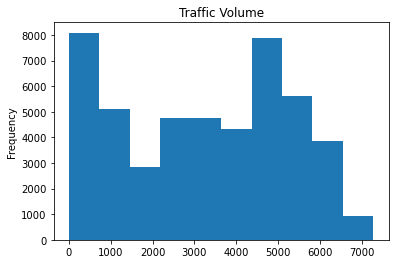

In [6]:
# Create a histogram
traffic['traffic_volume'].plot.hist(title='Traffic Volume')
plt.show()

In [7]:
# Statistical information
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 to 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7280 cars, with an average of 3380 cars.

About 25% of the time, there were 0 to 1193 cars passing the station each houir, which might indicate night time traffic or other events (construction, accidents at the specific hour where traffic might have been diverted) that might have resulted in low traffic.

However, about another 25% of the time, there was 4 times more traffic (up to 4933 cars during the hour).

We could use this data to further examine how daytime and night time affects traffic volume and compare the daytime and nighttime data

# Traffic Volume: Day vs Night

We'll start by dividing the dataset into two parts:
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [8]:
import datetime as dt

# Convert column to time format
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['hour'] = traffic['date_time'].dt.hour

# Seperating the data by daytime and nighttime
day = traffic.copy()[(traffic['hour'] >= 7) & (traffic['hour'] < 19)]
night = traffic.copy()[(traffic['hour'] >= 19) | (traffic['hour'] < 7)]

print(day.shape)
print(night.shape)

(23877, 10)
(24327, 10)


In [9]:
day

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0        None  288.28     0.00      0.0          40       Clouds   
1        None  289.36     0.00      0.0          75       Clouds   
2        None  289.58     0.00      0.0          90       Clouds   
3        None  290.13     0.00      0.0          90       Clouds   
4        None  291.14     0.00      0.0          75       Clouds   
...       ...     ...      ...      ...         ...          ...   
48194    None  283.84     0.00      0.0          75         Rain   
48195    None  283.84     0.00      0.0          75      Drizzle   
48196    None  284.38     0.00      0.0          75         Rain   
48197    None  284.79     0.00      0.0          75       Clouds   
48198    None  284.20     0.25      0.0          75         Rain   

           weather_description           date_time  traffic_volume  hour  
0             scattered clouds 2012-10-02 09:00:00            5545     9  
1                broken clouds 2012-10-02 10:00:00            4516    10  
2              overcast clouds 2012-10-02 11:00:00            4767    11  
3              overcast clouds 2012-10-02 12:00:00            5026    12  
4                broken clouds 2012-10-02 13:00:00            4918    13  
...                        ...                 ...             ...   ...  
48194    proximity shower rain 2018-09-30 15:00:00            4302    15  
48195  light intensity drizzle 2018-09-30 15:00:00            4302    15  
48196               light rain 2018-09-30 16:00:00            4283    16  
48197            broken clouds 2018-09-30 17:00:00            4132    17  
48198               light rain 2018-09-30 18:00:00            3947    18  

[23877 rows x 10 columns]

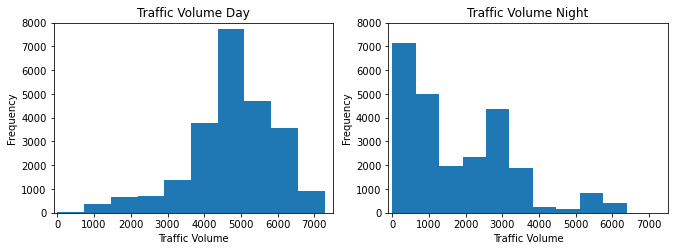

In [10]:
# Creating histograms for daytime and nighttime traffic
fig = plt.figure(figsize=(11,3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(day['traffic_volume'])
ax1.set_xlabel('Traffic Volume')
ax1.set_ylabel('Frequency')
ax1.set_title('Traffic Volume Day')
ax1.set_xlim(-100,7500)
ax1.set_ylim(0,8000)

ax2.hist(night['traffic_volume'])
ax2.set_xlabel('Traffic Volume')
ax2.set_ylabel('Frequency')
ax2.set_title('Traffic Volume Night')
ax2.set_xlim(-100,7500)
ax2.set_ylim(0,8000)

plt.show()

In [11]:
# Daytime traffic volume statistics
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
# Nighttime traffic volume statistics
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram of the daytime traffic is skewed to the left, meaning that most of the time the traffic volume is high.
About 75% of the time, the traffic during this time is 4252 cars or more

The histogram of the nighttime traffic is skewed to the right, meaning that most of time the traffic is low.
About 75% of the time, the traffic during this time is less than 2819

Althought there are areas during the daytime where there is heavy traffic, the traffic at night in general is light, and since the goal is to find heavy traffic indicators, we will continue our analysis without the nighttime traffic data

# Time Indicators

One of the possible indicators of heavy traffic is time

There might be more people on the road in a certain month, on a certain day, or at a ertain time of the day

We will look at a plots showing how the traffic volume changed according to the following:
* Month
* Day of the week
* Time of day

In [13]:
#Findiong the average traffic volume by month
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

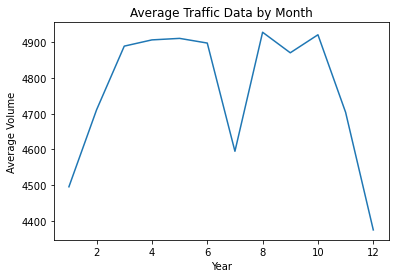

In [14]:
# Creating a chart showing the average volume by month
by_month['traffic_volume'].plot.line(title='Average Traffic Data by Month', xlabel='Year', ylabel='Average Volume')
plt.show()

The average traffic data starts in January at the low end, and steadily increases until March, where it plateaus until June, then sharply decreases towards July, then sharply increases in August, where it is realtively stable until October, then declines all the way towards the end of the year

Traffic starts to decrease as it goes towards the colder months and traffic starrts to increase again as the weather starts to get warmer

Though it is interesting to note that the average traffic data sharply decreases from June and sharply goes back up from July

To understand why this is the case, we will look into each year for July for further analysis

In [15]:
# Average July traffic data by year
day['year'] = day['date_time'].dt.year
july_data = day[day['month'] == 7]
july_data = july_data.groupby('year').mean()
july_data['traffic_volume']

year
2013    4914.354054
2014    4871.598240
2015    4613.146226
2016    3924.923645
2017    4734.120301
2018    4586.899543
Name: traffic_volume, dtype: float64

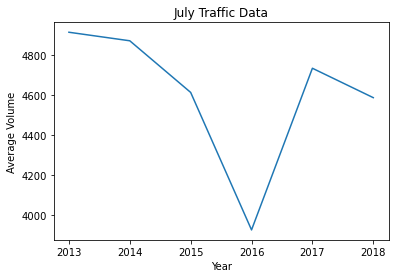

In [16]:
# Creating a chart showing the average July traffic data by year
july_data['traffic_volume'].plot.line(title='July Traffic Data', xlabel='Year', ylabel='Average Volume')
plt.show()

Generally, July has heavy traffic as well, but from the period of 2015 to 2016, traffic volume sharply decreased, and resumed to normal after 2016.

This means that there might have been a one-off event (construction etc) that would have happened during the July period, and could be treated as an exceptional case 

Using this discovery, for exploration purposes, we will plot a graph without the July 2016 data to see if there were any significant changes

In [17]:
# Finding the mean July traffic data excluding the year 2016
no_july_2016 = day[(day['month'] == 7) & (day['year'] != 2016)]
no_july_2016 = no_july_2016.mean()
no_july_2016_mean = no_july_2016['traffic_volume']
no_july_2016_mean

4733.0

In [18]:
# Showing the average traffic data excluding the July 2016 period
by_month_copy = by_month.copy()
by_month_copy['traffic_volume'][7] = no_july_2016_mean
by_month_copy['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4733.000000
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

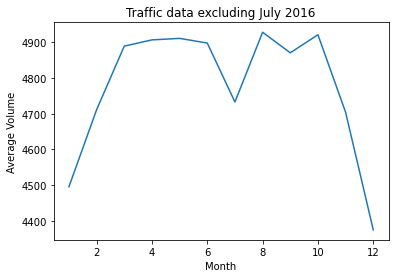

In [19]:
# Chart data showing traffic data excluding the July 2016 data
by_month_copy['traffic_volume'].plot.line(title='Traffic data excluding July 2016', xlabel='Month', ylabel='Average Volume')
plt.show()

When excluding the July 2016 data, we can still see that the average traffic decreases heading towards July, but the decline wouldn't be as dramatic compared to the line graph that includes the July 2016 data

So, if treating July 2016 as a one-time event, this graph would probably represent a more accurate picture of the aerage monthly traffic data.

However, continuing our analysis, we will use the original data (without excluding July 2016) as this  was to merely present what the graph would look like removing the exceptional case of July 2016

# Time Indicators II

We will take a more granular look at the data and analyse the days of the week

In [20]:
# Average traffic volume during the days of the week
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby ('dayofweek' ) .mean()
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

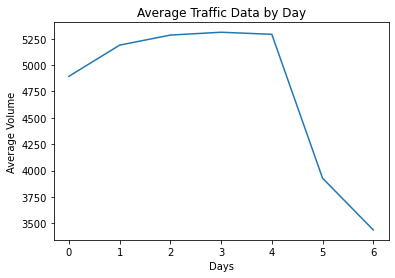

In [21]:
# Chart of average traffic data by the day
by_dayofweek['traffic_volume'].plot.line(title='Average Traffic Data by Day', xlabel='Days', ylabel='Average Volume')
plt.show()

Traffic volume was significantly heavier during the weekdays compared to weekends 

We see that on average there were over 5000 cars on the road (with the exception for Monday) during the weekdays and less than 4000 cars during the weekends

# Time Indicators III

As the weekend data drags down the averages, we will continue the analysis by looking at the weekday/weekend traffic data seperately and drill down further and look at the time of the day

In [22]:
# Splitting the data based on the weekday and weekend
day['hour'] = day['date_time'].dt.hour
weekdays = day.copy()[day['dayofweek'] <= 4] #4 = Friday
weekends = day.copy()[day['dayofweek'] > 4]

by_weekdays = weekdays.groupby('hour').mean()
by_weekends = weekends.groupby('hour').mean()

print('Average Weekday Traffic Data')
print(by_weekdays['traffic_volume'])
print()
print('Average Weekend Traffic Data')
print(by_weekends['traffic_volume'])

Average Weekday Traffic Data
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

Average Weekend Traffic Data
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


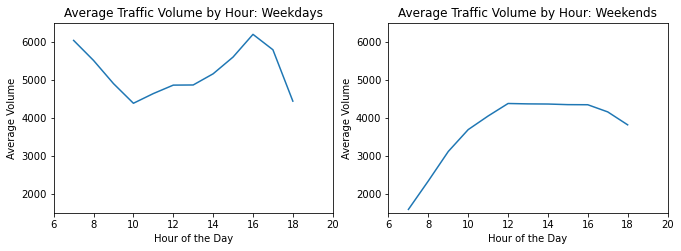

In [23]:
# Graph for weekday traffic data
fig = plt.figure(figsize=(11,3.5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('Average Traffic Volume by Hour: Weekdays')
ax2.set_title('Average Traffic Volume by Hour: Weekends')

ax1.set_xlabel('Hour of the Day')
ax2.set_xlabel('Hour of the Day')

ax1.set_ylabel('Average Volume')
ax2.set_ylabel('Average Volume')

ax1.set_xlim(6,20)
ax2.set_xlim(6,20)

ax1.set_ylim(1500,6500)
ax2.set_ylim(1500,6500)

ax1.plot(by_weekdays['traffic_volume'])
ax2.plot(by_weekends['traffic_volume'])

plt.show()

Traffic volume during the weekdays starts high at 7am, decreases until 10am, steadily increases until 4pm, and sharply declines until the rest of the day. Using this information, we can assume that peak rush hour in this area is at 7am and 4pm. We see volumes of over 6,000 cars during peak rush hours

This graph contrasts with the weekends where from the start traffic volume is low, steadily increases until 12pm, pleateaus until 4pm and slowly declines until the rest of the day

To summarise, in regards to time-related indicators of heavy traffic:
* The traffic is usually heavier during warm months (March–October) compared to colder months (November–February)
* The traffic is usually heavier on weekdays compared to weekends
* On weekdays, peak rush hour is around 7am and 4pm

# Weather Indicators

Another possible indicator of heavy traffic is weather

The dataset provides us with a few useful columns about weather:
* temp 
* rain_1h
* snow_1h
* clouds_all
* weather_main 
* weather_description

In [24]:
# Looking at correlation between weather data and traffic volume
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
year             -0.003557
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

Temperature has the strongest correlation at 0.13 compared to the other columns, which show a significantly lower correlation value

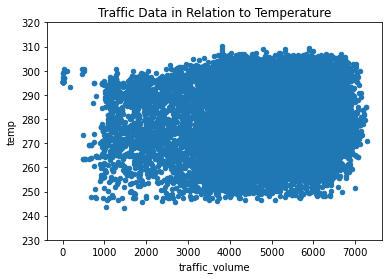

In [25]:
# Scattter plot with traffic volume and temperature
day.plot.scatter('traffic_volume','temp', title='Traffic Data in Relation to Temperature')
plt.ylim(230,320) # two outliers below have been removed to represent a better picture
plt.show()

Looking at the graph, we see little correlation with traffic volume in relation to the change in temperature

There is low traffic when the temperature is low and there is low traffic when the temperature is high and the same goes when traffic volume is high

Therefore, this is not a reliable indicator to determine heavy traffic

# Weather Types

We will look at the <mark>weather_main</mark> and the <mark>weather_description</mark> columns for further exploration

In [26]:
# Getting the mean values for the weather data
by_weather_main = day.groupby('weather_main').mean()
by_weather_desc = day.groupby('weather_description').mean()

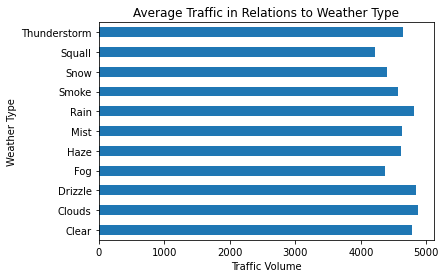

In [27]:
# Creating a bar plot for the two columns
by_weather_main['traffic_volume'].plot.barh(title='Average Traffic in Relations to Weather Type')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Type')
plt.show()

From the analysis, it looks like there is no weather type that has more than 5000 cars, and none of them strongly stand out from each other, which makes it difficult to use this data to identify heavy traffic indicators

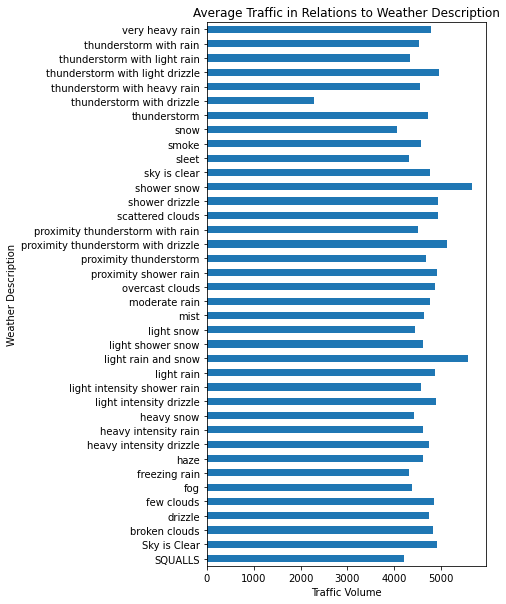

In [28]:
# Bar chart for weather descriptions
by_weather_desc['traffic_volume'].plot.barh(figsize=(5,10), title='Average Traffic in Relations to Weather Description')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

There are 3 cases where average traffic exceeds over 5000 cars:
* Shower Snow:
* Proximity Thunderstorm with Drizzle
* Light Rain and Snow

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking

It could also be that people do not go out in the first place when weather is extremely bad

# Conclusion

In this project, we tried to find indicators of heavy traffic on the I-94 Interstate highway and have found 2 main indicators:

Time Indicator:
* The traffic is usually heavier during warm months (March–October) compared to colder months (November–February)
* The traffic is usually heavier on weekdays compared to weekends
* On weekdays, peak rush hour is around 7am and 4pm

Weather Indicators:
* Shower Snow
* Proximity Thunderstorm with Drizzle
* Light Rain and Snow
